In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from patsy import dmatrices
import statsmodels.api as sm

# Model 1

In [3]:
df = pd.read_excel('task2_data.xlsx', sheet_name = 'model1')
df.head()

,y,x
0,21.584034,22.11
1,-54.794651,10.14
2,-14.805773,3.44
3,21.546317,-4.11
4,-19.952208,11.76


In [4]:
y, X = dmatrices('y ~ x', data=df, return_type='dataframe')
print(len(X))
X.head()

100


,Intercept,x
0,1.0,22.11
1,1.0,10.14
2,1.0,3.44
3,1.0,-4.11
4,1.0,11.76


Text(0, 0.5, 'y')

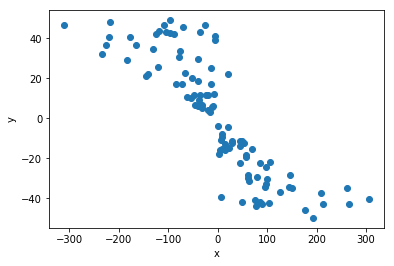

In [5]:
plt.figure()
plt.scatter(df.y, df.x)
plt.xlabel('x')
plt.ylabel('y')

In [6]:
model = sm.OLS(y, X)    # Describe model
results = model.fit()       # Fit model
print(results.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     259.2
Date:                Fri, 27 Sep 2019   Prob (F-statistic):           2.82e-29
Time:                        18:34:19   Log-Likelihood:                -547.52
No. Observations:                 100   AIC:                             1099.
Df Residuals:                      98   BIC:                             1104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1168      5.836      0.191      0.8

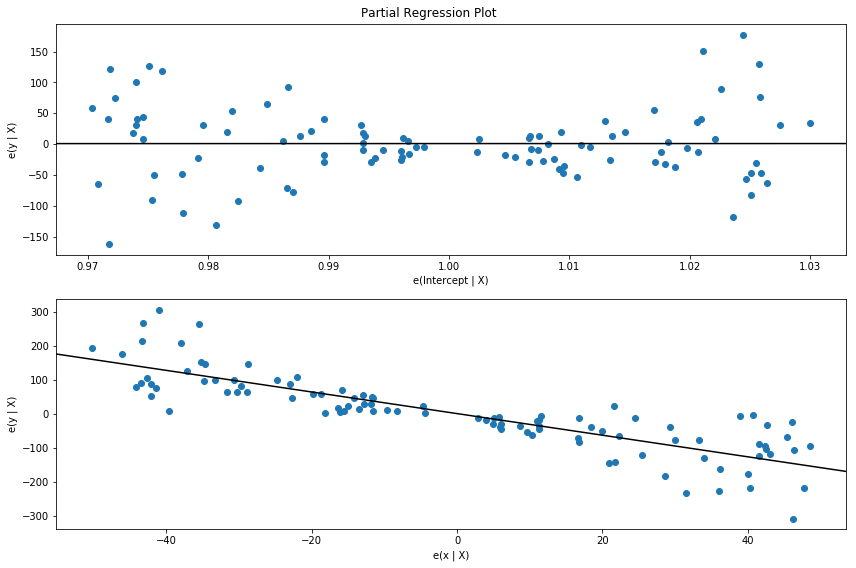

In [7]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)

In [8]:
sm.stats.diagnostic.het_white(results.resid, X, retres=False)

(20.466121073295128,
 3.5961539542164916e-05,
 12.480302550936303,
 1.5023805275160405e-05)

In [9]:
sm.stats.diagnostic.acorr_breusch_godfrey(results, nlags=12, store=False)

(9.49034917317234, 0.6605750709815705, 0.7514576451580117, 0.6975053053161319)

In [10]:
sm.stats.diagnostic.breaks_cusumolsresid(results.resid, ddof=1)

(0.8760286079507601, 0.4266646652568774, [(1, 1.63), (5, 1.36), (10, 1.22)])

# Model 2

In [11]:
df = pd.read_excel('task2_data.xlsx', sheet_name = 'model2')
df.head()

,y,x
0,269.082882,-9.34
1,-6.077033,21.82
2,755.322565,4.20
3,10.907993,31.36
4,-763.644536,39.21


Text(0, 0.5, 'y')

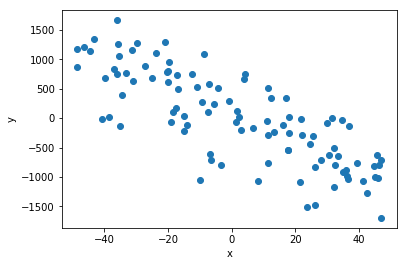

In [16]:
plt.figure()
plt.scatter(df.x, df.y)
plt.xlabel('x')
plt.ylabel('y')

In [17]:
y, X = dmatrices('y ~ x', data=df, return_type='dataframe')
print(len(X))
X.head()

100


,Intercept,x
0,1.0,-9.34
1,1.0,21.82
2,1.0,4.20
3,1.0,31.36
4,1.0,39.21


In [18]:
model = sm.OLS(y, X)    # Describe model
results = model.fit()       # Fit model
print(results.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     165.7
Date:                Fri, 27 Sep 2019   Prob (F-statistic):           8.70e-23
Time:                        18:39:30   Log-Likelihood:                -757.51
No. Observations:                 100   AIC:                             1519.
Df Residuals:                      98   BIC:                             1524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.9352     47.738      0.774      0.4

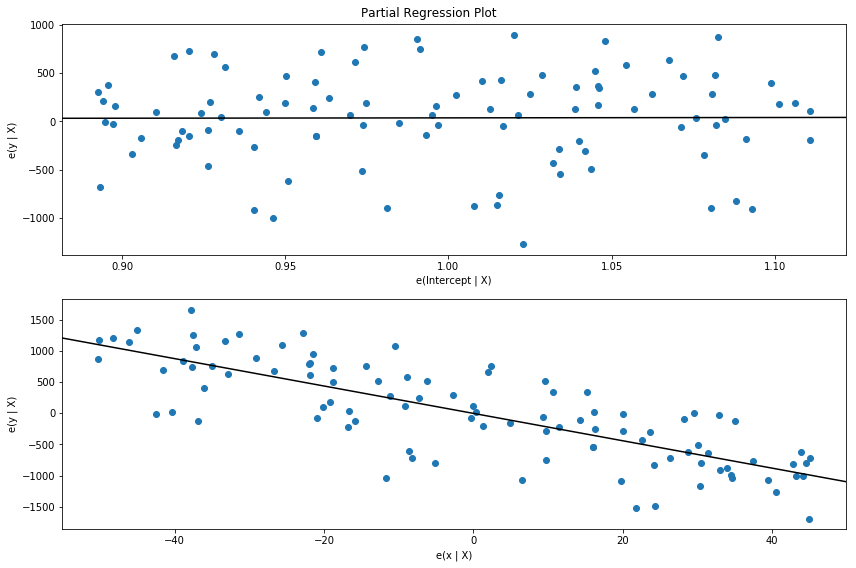

In [19]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)

In [20]:
sm.stats.diagnostic.het_white(results.resid, X, retres=False)

(3.2686357522150655,
 0.1950853983348405,
 1.638856592328697,
 0.19953297343624754)

In [21]:
sm.stats.diagnostic.acorr_breusch_godfrey(results, nlags=12, store=False)

(8.31536627807341, 0.7600255416525439, 0.6499830550333651, 0.793551505292798)

In [22]:
sm.stats.diagnostic.breaks_cusumolsresid(results.resid, ddof=1)

(0.7647463900431709, 0.602407573967704, [(1, 1.63), (5, 1.36), (10, 1.22)])

# Model 3

In [23]:
df = pd.read_excel('task2_data.xlsx', sheet_name = 'model3')
df.head()

,y,x
0,1.011618e+06,-36.07
1,1.593567e+05,-18.55
2,-1.045895e+06,44.97
3,-1.514168e+04,10.74
4,3.559852e+04,-8.38


Text(0, 0.5, 'y')

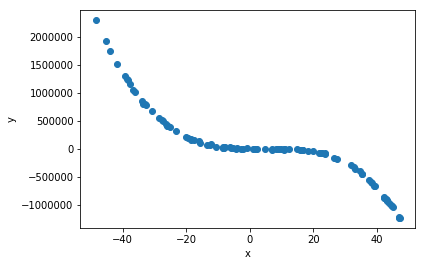

In [31]:
plt.figure()
plt.scatter(df.x, df.y)
plt.xlabel('x')
plt.ylabel('y')

In [32]:
df['x_2'] = df.x**2
df['x_3'] = df.x**3

y, X = dmatrices('y ~ x_2 + x_3', data=df, return_type='dataframe')
print(len(X))
X.head()

100


,Intercept,x_2,x_3
0,1.0,1301.0449,-46928.689543
1,1.0,344.1025,-6383.101375
2,1.0,2022.3009,90942.871473
3,1.0,115.3476,1238.833224
4,1.0,70.2244,-588.480472


In [33]:
model = sm.OLS(y, X)    # Describe model
results = model.fit()       # Fit model
print(results.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.972e+05
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          8.97e-176
Time:                        18:43:40   Log-Likelihood:                -1066.2
No. Observations:                 100   AIC:                             2138.
Df Residuals:                      97   BIC:                             2146.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1571.1131   1559.070     -1.008      0.3

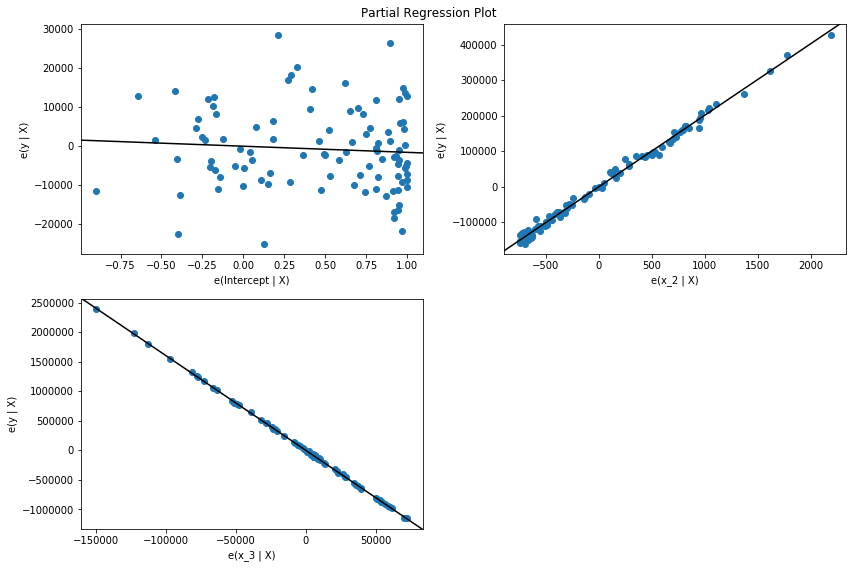

In [27]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)

In [28]:
sm.stats.diagnostic.het_white(results.resid, X, retres=False)

(0.37568457305432457,
 0.9959729460572933,
 0.07089504146806924,
 0.9963740470201563)

In [29]:
sm.stats.diagnostic.acorr_breusch_godfrey(results, nlags=12, store=False)

(12.677578903675357,
 0.3929045511479453,
 1.0283672407033932,
 0.4310009816034317)

In [30]:
sm.stats.diagnostic.breaks_cusumolsresid(results.resid, ddof=1)

(0.8757604189909759, 0.4270535872125247, [(1, 1.63), (5, 1.36), (10, 1.22)])

# Model 4

In [34]:
df = pd.read_excel('task2_data.xlsx', sheet_name = 'model4')
df.head()

,y,x1,x2,x3,x4
0,-360.545698,27.63,-4.56,61.3,-1.06
1,486.557390,-25.54,-3.86,50.0,-1.79
2,738.995502,-45.39,-4.37,57.6,-1.08
3,326.110955,-11.97,3.93,41.5,-1.84
4,476.895398,-27.03,-1.05,93.6,-1.00


Text(0.5, 0, 'x4')

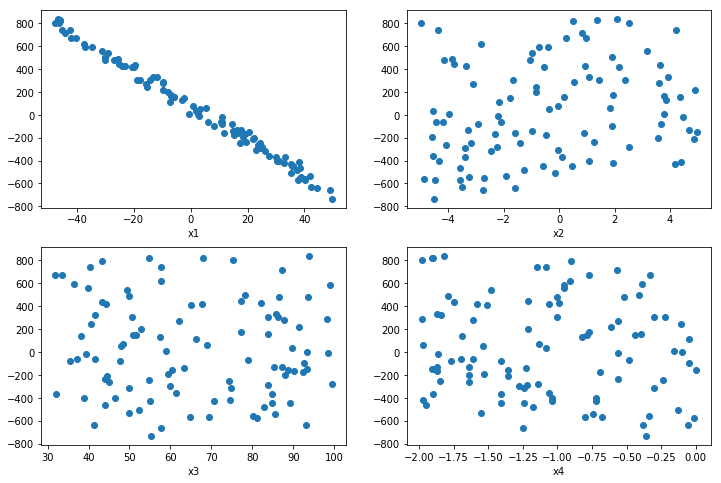

In [35]:
plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
plt.scatter(df.x1, df.y)
plt.xlabel('x1')
plt.subplot(2, 2, 2)
plt.scatter(df.x2, df.y)
plt.xlabel('x2')
plt.subplot(2, 2, 3)
plt.scatter(df.x3, df.y)
plt.xlabel('x3')
plt.subplot(2, 2, 4)
plt.scatter(df.x4, df.y)
plt.xlabel('x4')

In [38]:
y, X = dmatrices('y ~ x1 + x2 + x4', data=df, return_type='dataframe')
print(len(X))
X.head()

100


,Intercept,x1,x2,x4
0,1.0,27.63,-4.56,-1.06
1,1.0,-25.54,-3.86,-1.79
2,1.0,-45.39,-4.37,-1.08
3,1.0,-11.97,3.93,-1.84
4,1.0,-27.03,-1.05,-1.00


In [39]:
model = sm.OLS(y, X)    # Describe model
results = model.fit()       # Fit model
print(results.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.047e+06
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          2.50e-249
Time:                        18:48:06   Log-Likelihood:                -147.15
No. Observations:                 100   AIC:                             302.3
Df Residuals:                      96   BIC:                             312.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.9855      0.225     66.689      0.0

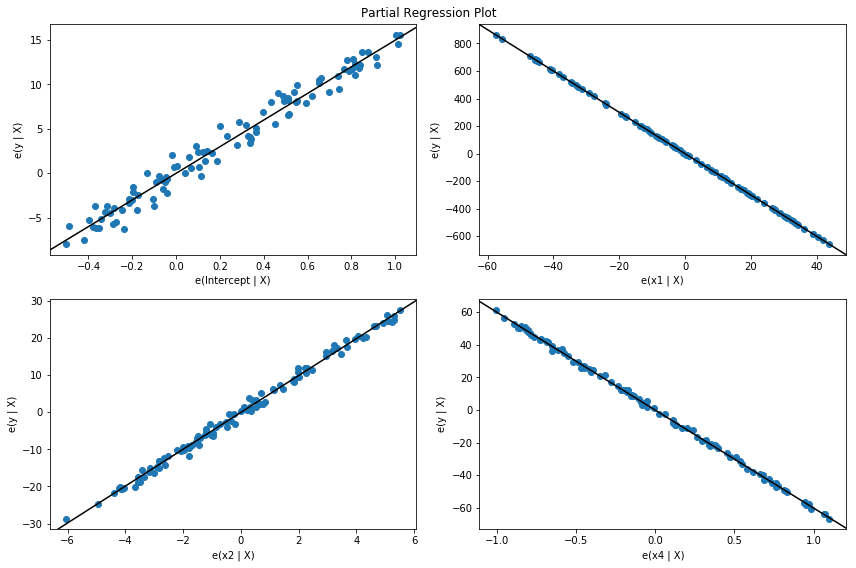

In [40]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)

In [41]:
sm.stats.diagnostic.het_white(results.resid, X, retres=False)

(8.623547825788137,
 0.4727237917595748,
 0.9437385256922747,
 0.49179268584105384)

In [42]:
sm.stats.diagnostic.acorr_breusch_godfrey(results, nlags=12, store=False)

(6.573528294120856, 0.8844634701007528, 0.4925231277459264, 0.9137859683423275)

In [43]:
sm.stats.diagnostic.breaks_cusumolsresid(results.resid, ddof=1)

(1.0091351397013741, 0.26033579988495187, [(1, 1.63), (5, 1.36), (10, 1.22)])